# Finch Carr - Homework 05
- I want to work carefully through a numeric/simulated solution to Bayes' Theorem
- Bayes' Theorem can be defined as $P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$
## Problem 1A)
- I need to create a normal distribution background with a million background events.

In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

(array([-6.74626866, -6.23880597, -5.73134328, -5.2238806 , -4.71641791,
        -4.20895522, -3.70149254, -3.19402985, -2.68656716, -2.17910448,
        -1.67164179, -1.1641791 , -0.65671642, -0.14925373,  0.35820896,
         0.86567164,  1.37313433,  1.88059701,  2.3880597 ,  2.89552239,
         3.40298507,  3.91044776,  4.41791045,  4.92537313,  5.43283582,
         5.94029851,  6.44776119,  6.95522388,  7.46268657,  7.97014925,
         8.47761194,  8.98507463,  9.49253731, 10.        , 10.50746269,
        11.01492537, 11.52238806, 12.02985075, 12.53731343, 13.04477612,
        13.55223881, 14.05970149, 14.56716418, 15.07462687, 15.58208955,
        16.08955224, 16.59701493, 17.10447761, 17.6119403 , 18.11940299,
        18.62686567, 19.13432836, 19.64179104, 20.14925373, 20.65671642,
        21.1641791 , 21.67164179, 22.17910448, 22.68656716, 23.19402985,
        23.70149254, 24.20895522, 24.71641791, 25.2238806 , 25.73134328,
        26.23880597, 26.74626866]),
 array([ 0.2564

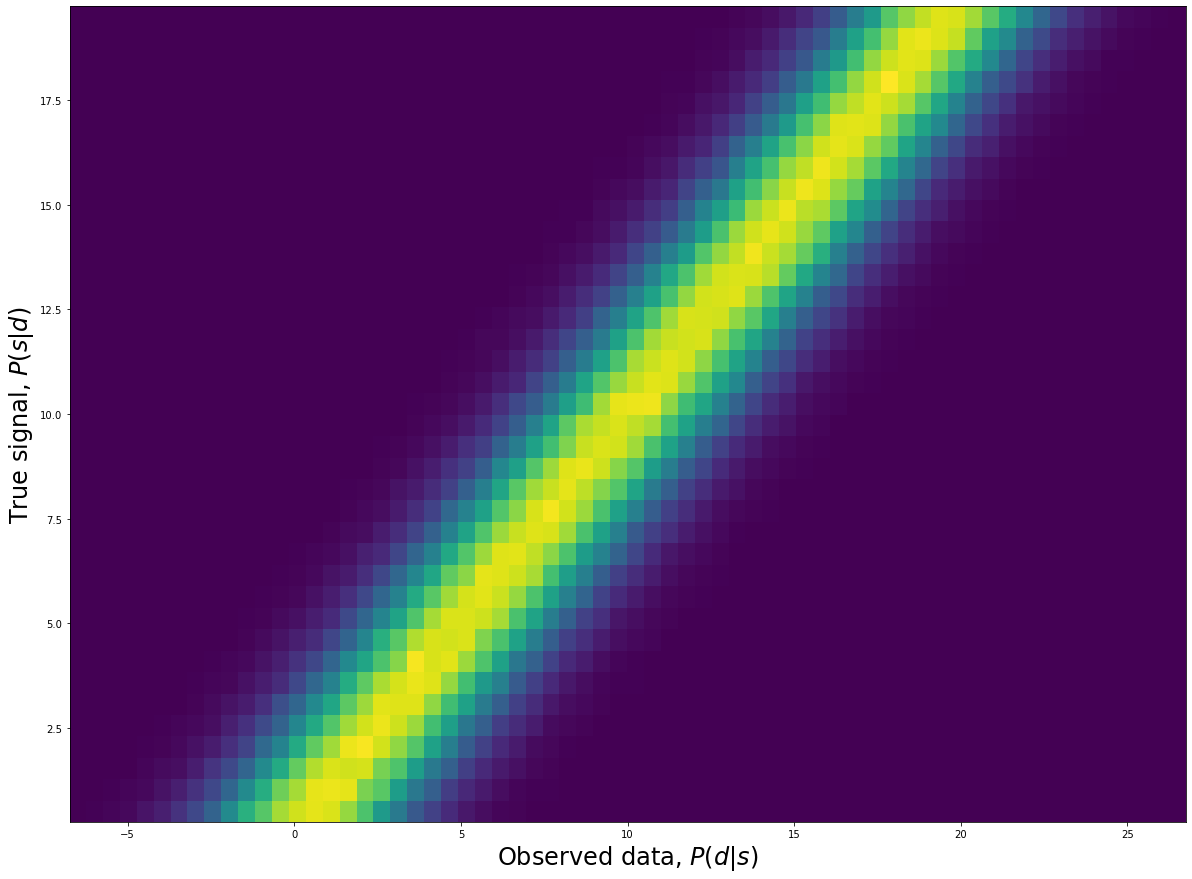

In [2]:
bkgd = stats.norm.rvs(loc=0, scale=2, size=1000000, random_state=1)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000, random_state=2)

data = bkgd + signal
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
datacenters, signalcenters

### Problem 1B)
- I want to select a true injected signal and plot the probability of the data giving me that signal with a stair plot
  - Graphically, I am setting a specific y-value, and plotting the probabilities of what I may observe given said y-value of true signal
  - I choose to look at all values associated with a true signal value of 9.5
  - NOTE: dataedges/x-axis has a scale of 34 with 68 steps, so each step is 0.5 (34/68) units. signaledges/y-axis has 20 values and 40 steps so each step is 0.5 (20/40) units. So if I want a y-value of 9.5, I actually need to search for the $9.5/0.5$-th value (*the 19th value*) in the y-axis array of the P(s|d) histogram and plot the probabilities of all x-values associated with it!

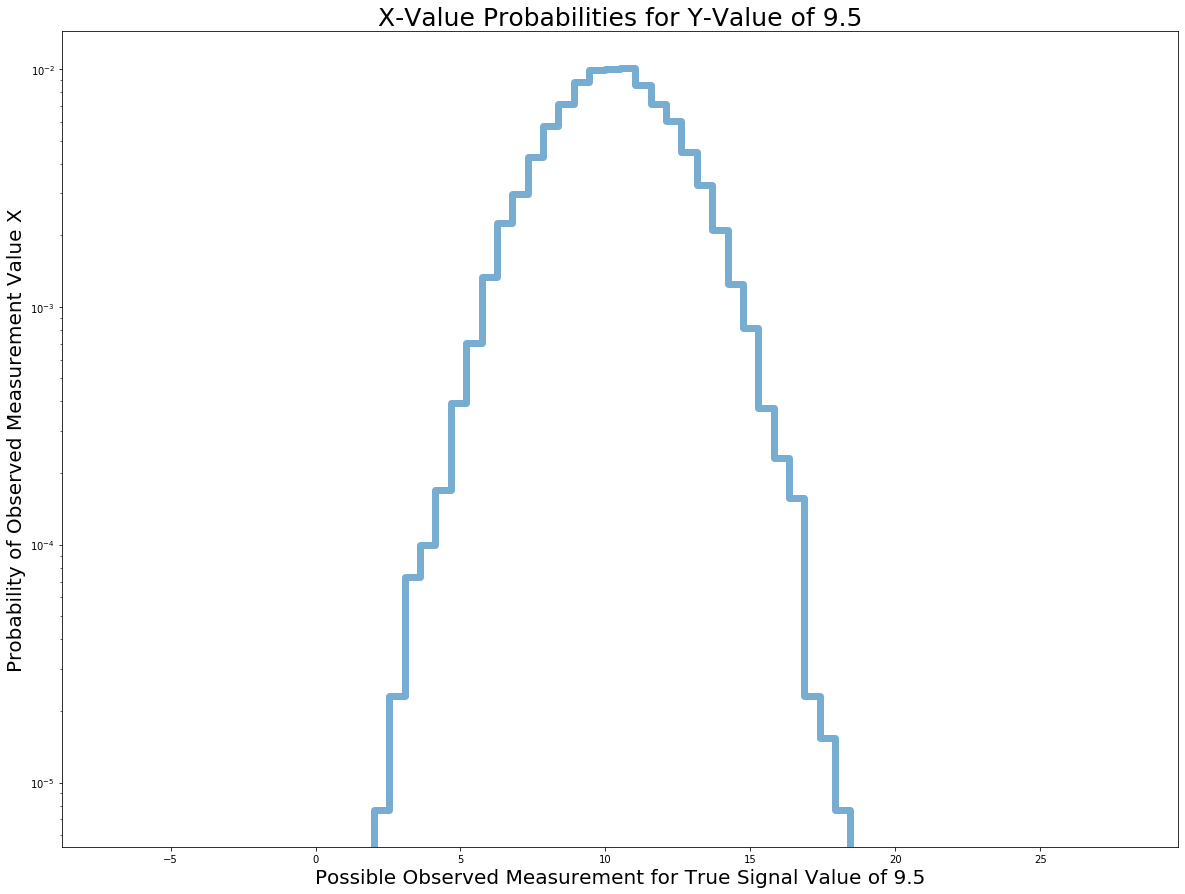

In [3]:
dataedges = np.linspace(-7,28, 67)

# Find the x-axis pdf distribution associated with the 19th value in the y-axis array portion of the 2D Histogram above
ysliceA = Psd[:,19]
dataedges = np.linspace(-7,28,67)

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible Observed Measurement for True Signal Value of 9.5', size=20)
plt.ylabel('Probability of Observed Measurement Value X', size=20)
plt.title('X-Value Probabilities for Y-Value of 9.5', size=25)
ax.step(dataedges, ysliceA, alpha=0.6, linewidth=7)
plt.show()

- The graph above shows every value on a y-axis slice of $y=9.50$ and the probability distribution of that array of values
- Another way to explain the plot is the x-axis is the value observed when the true signal is 9.5, and the y-axis is the probability of observing any given data when the true signal measurement is 9.5
  - For example, when the true signal is 9.5, it is much more likely that you will observe  a measurement of 9.5 than you would a measurement of 11.5 or 7.5
### Problem 1C)
- Now what if I take any given observation, what is the probability distribution of true signals that could give that specific observation measurement?

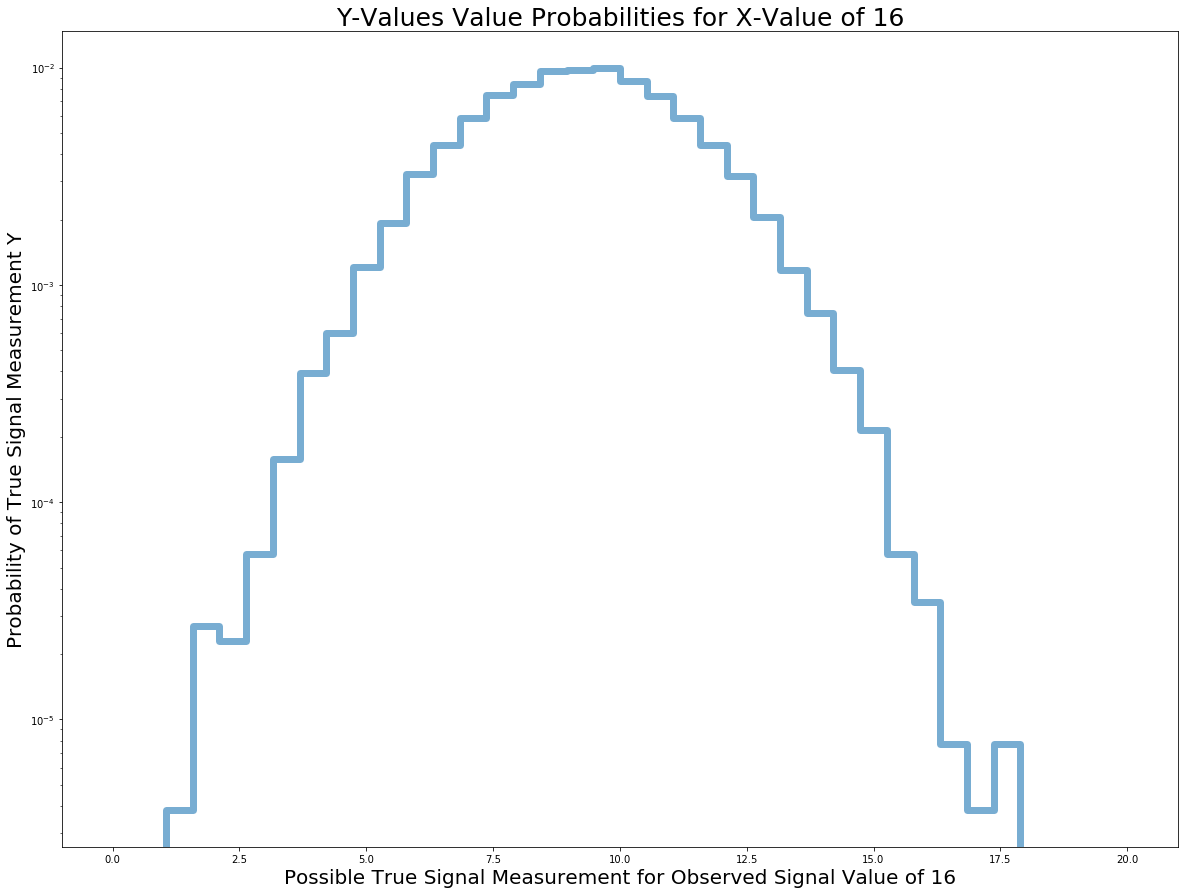

9.999999999999998


In [4]:
dataedges = np.linspace(-7,28, 67)

# Find the y-axis pdf distribution associated with the 19th value in the y-axis array portion of the 2D Histogram above
xsliceA = Psd[32,:]
signaledges = np.linspace(0,20,39)

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible True Signal Measurement for Observed Signal Value of 16', size=20)
plt.ylabel('Probability of True Signal Measurement Y', size=20)
plt.title('Y-Values Value Probabilities for X-Value of 16', size=25)
ax.step(signaledges, xsliceA, alpha=0.6, linewidth=7)
plt.show()
print(signaledges.mean())

- This plot shows that for any observed signal of $x=16$, the true signal is much more likely to have a observed signal value of 10 than it is to have an observed signal value of something closer to 16
## Problem 2) 
- I want to repeat this process and make the plots shown above with a background distribution with a non-zero mean

Text(0.5, 0, 'Observed data, $P(d|s)$')

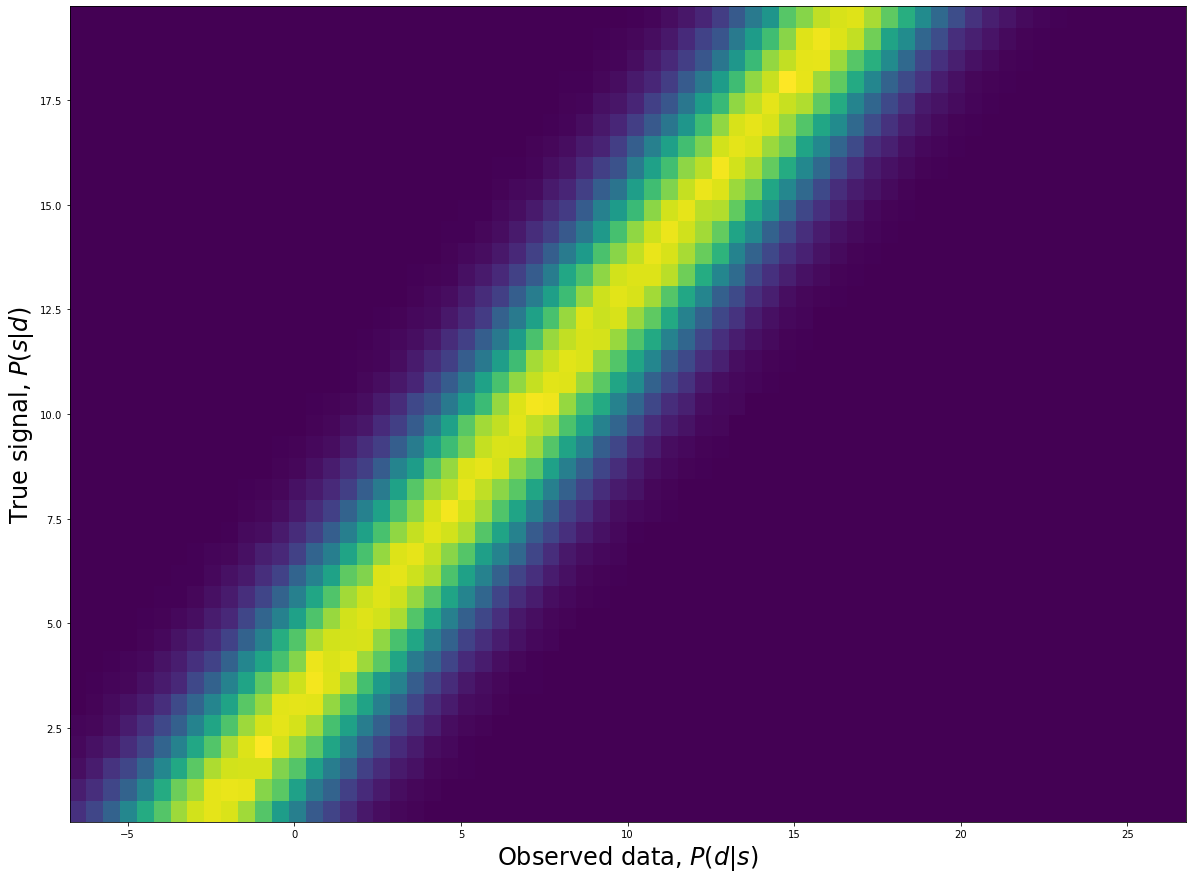

In [5]:
bkgd2 = stats.norm.rvs(loc=-3, scale=2, size=1000000, random_state=1)
signal2 = stats.uniform.rvs(loc=0, scale=20, size=1000000, random_state=2)

data2 = bkgd2 + signal2
signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

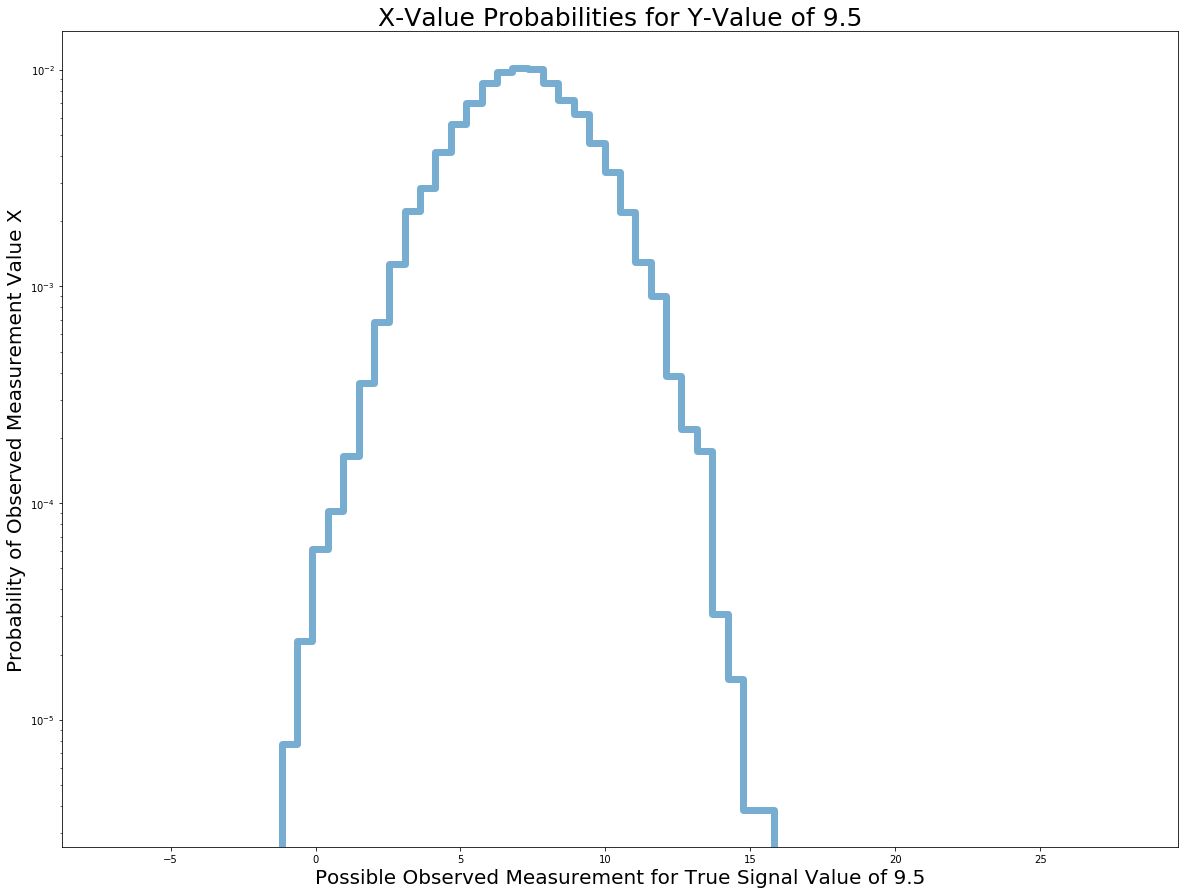

In [6]:
dataedges2 = np.linspace(-7,28, 67)

# Find the x-axis pdf distribution associated with the 19th value in the y-axis array portion of the 2D Histogram above
ysliceB = Psd[:,19]
dataedges = np.linspace(-7,28,67)

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible Observed Measurement for True Signal Value of 9.5', size=20)
plt.ylabel('Probability of Observed Measurement Value X', size=20)
plt.title('X-Value Probabilities for Y-Value of 9.5', size=25)
ax.step(dataedges2, ysliceB, alpha=0.6, linewidth=7)
plt.show()

- For a given true signal of 9.5, there are a range of observed values plotted on the x-axis, and the probability of those values is plotted on the y-axis. 
  - For example, it is highly likely that for any observation of 9.5, I will have a true signal of 6.5 as opposed to 9.5
- Now let's take a vertical slice of true signals for a given observation value

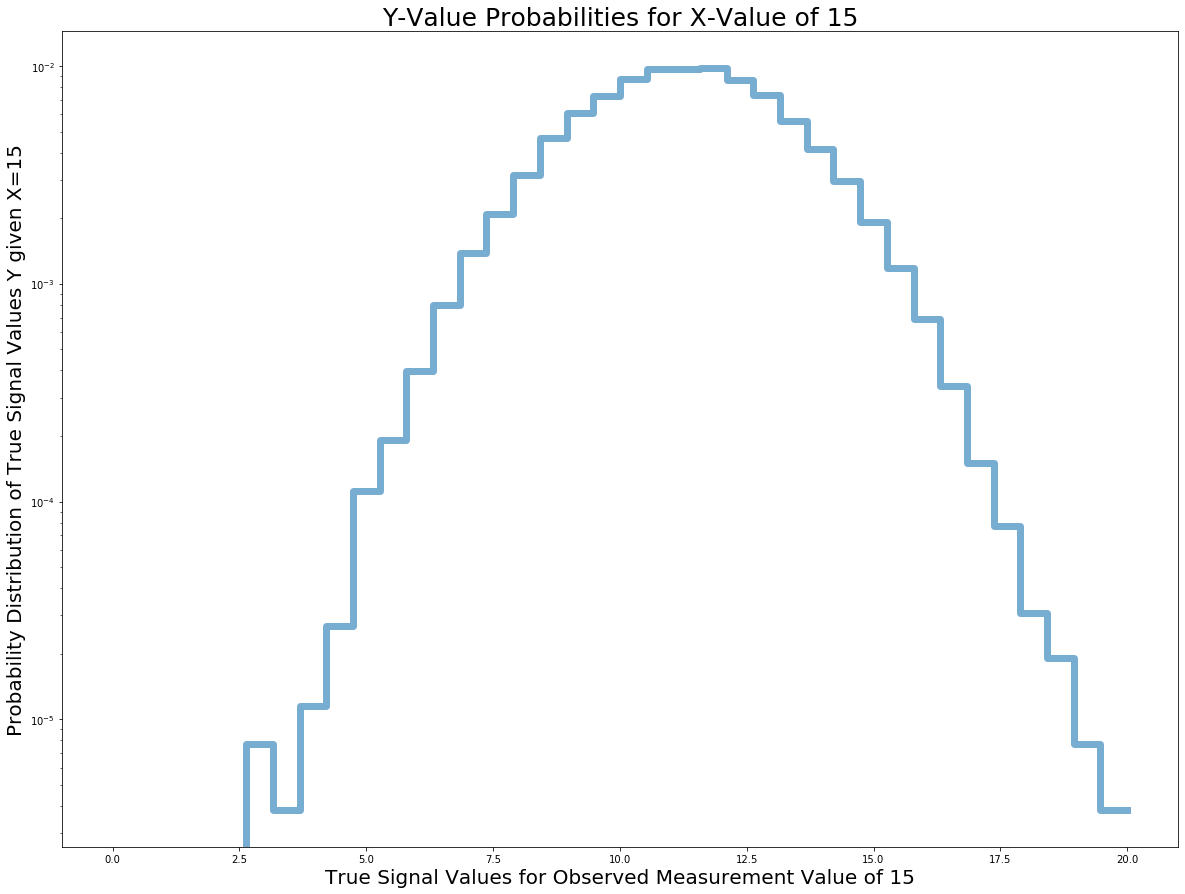

In [7]:
xsliceB = Psd[30,:] # Gives yvalues for 30th x value which is equal to 30/2 = 15
signaledges2 = np.linspace(0,20,39) # match size of xsliceB

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('True Signal Values for Observed Measurement Value of 15', size=20)
plt.ylabel('Probability Distribution of True Signal Values Y given X=15', size=20)
plt.title('Y-Value Probabilities for X-Value of 15', size=25)
ax.step(signaledges2, xsliceB, alpha =0.6, linewidth=7)
plt.show()
print()

- This plot shows that if I measure a signal value of 15, it is more than likely going to be associated with a true signal that holds a value of 17.9-18.0, and is very unlikely associated with a true signal of 15
- The plots are not centered on the same value as the previous group of plots because the normal background distribution added to the data is a set of random variates with a mean value of -3, so the x-axis is going to be distributed the same as the y-axis just like before, but will (on average) be shifted by a value of -3, sometimes shifted a little more or a little less than -3, but very rarely will the signal be shifted a value of 0, so overall, the plots are not centered like the previous group.